# Data analysis

In [1]:
import pandas
from matplotlib import pyplot

In [2]:
pyplot.style.use('ggplot')
pyplot.rc('figure', figsize=(16, 9))

In [3]:
type_mapping = {
    'customer_id': str,
    'timestamp': str,
    'product_id': str,
    'title': str,
    'category_name': str,
    'price': float,
}
kwargs = dict(
    usecols=type_mapping.keys(),
    dtype=type_mapping,
    engine='c',
    nrows=None,
    na_values={'price': ''},
    keep_default_na=False,
    memory_map=True,
)

print('Loading events...')
events = pandas.read_csv(
    '../data/events_train.csv',
    na_filter=False,
    **kwargs,
)

print('Loading purchases...')
purchases = pandas.read_csv(
    '../data/purchases_train.csv',
    **kwargs,
)

def convert_timestamp(dataframe):
    dataframe['timestamp'] = pandas.to_datetime(
        dataframe['timestamp'].str.replace(' UTC', ''),
        format='%Y-%m-%d %H:%M:%S.%f',
    )

print('Converting timestamp columns...')
convert_timestamp(events)
convert_timestamp(purchases)

print('Done.')

Loading events...
Loading purchases...
Converting timestamp columns...
Done.


In [4]:
events

,customer_id,timestamp,product_id,title,category_name,price
0,204685f9-00f0-4a36-bab1-e0b74673c3b1,2019-07-01 00:00:01.101977,f130c542-d793-41d0-88f6-d1c52b4fe8f0,Michael Kors Nappa Leather Racer Jacket,,747.49
1,552445a5-f41d-4b25-b479-4e776d9bee61,2019-07-01 00:00:01.901589,29db8f57-49bd-4108-a0bb-0d245278e999,Puma Woven Shorts Girls,,11.92
2,fac01f48-a03a-41f2-acd5-b5f4e407d9c2,2019-07-01 00:00:08.954928,a90bddc4-8eb7-4c99-aa4f-2f2377c246a2,Trendyol Multi-colored Flywheel Detailed Swimwear,,23.85
3,552445a5-f41d-4b25-b479-4e776d9bee61,2019-07-01 00:00:09.721589,600268e1-a2ba-4b1b-ab57-58c577412af0,Puma Woven Shorts Girls,,11.92
4,bc59a341-040f-41ea-8f33-cc4a02c2d85d,2019-07-01 00:00:13.745257,b74e0b38-1efe-4d86-9718-952cc2580212,Women's dress ROXY NEW LEASEOFLIFE J KTDR,,40.00
...,...,...,...,...,...,...
14614380,a4b26314-669e-46dd-92a5-9f1258eb5c81,2019-08-31 23:59:54.598017,d451d3e2-eabe-4f21-a4ff-289c756d87a1,Adidas Club T Shirt Mens,Men>Men Clothing>T-Shirts & Polo shirts>Short ...,38.25
14614381,72b72580-2b3f-42cd-97d0-3d24816b33ba,2019-08-31 23:59:55.097722,804fae53-29a4-46f2-bd3d-24c04bbc34df,Women's Bag WOOX Mendica,Accessories >Backpacks and Bags>Handbags,33.53
14614382,c09ad440-ba4e-4748-94e8-8bb3127a7a6f,2019-08-31 23:59:56.685950,0ca17844-38c2-4382-a506-1a53b223f655,USA Pro Quilted Gilet Junior Girls,Children>Girl's Clothing>Jackets>Vests,28.12
14614383,a099b544-64d5-451b-a424-7130ff97f765,2019-08-31 23:59:59.197457,60a2b46b-722b-4433-a65f-857e82a0ddab,Lee Cooper Riv Boots Mens,Men>Men Footwear>Ankle shoes>Casual,24.15


In [5]:
purchases

,customer_id,timestamp,product_id,title,category_name,price
0,0d1b7397-7d3c-44c0-9efc-d38bf197828b,2019-07-01 00:05:54.308966,954f9f2c-d3ca-4236-ac9a-4ea7bcf09305,Trendyol Leopard print Bikini bottom,,NaN
1,81ccae7e-e496-4997-a289-4669bf53f33e,2019-07-01 00:20:03.404186,75b281e5-8a16-42cb-9ae0-9a98db7a2c40,No Fear Reflect Shorts Mens,,NaN
2,50777c55-8dd6-4309-a5ca-26e66c8a8279,2019-07-01 00:34:35.989935,0112dec8-47f5-4c2c-9109-571e2dbb6345,Trendyol Multicolor camisole Blouse,,NaN
3,50777c55-8dd6-4309-a5ca-26e66c8a8279,2019-07-01 00:34:35.991935,0fa25a2d-2aa1-4397-82f1-5a64f3b1272d,Trendyol White High Waist Skinny Jeans,,NaN
4,647d269f-b18f-4558-8653-93369d862ec9,2019-07-01 00:52:53.083698,81c01216-55a9-4588-a722-bccf0bf35fd5,Firetrap Lazer Polo Shirt,,NaN
...,...,...,...,...,...,...
188707,4546a0d6-8713-41d8-8916-005561232327,2019-08-31 23:57:50.043362,4331a44c-9547-432e-bb82-8b94bc155372,Golddigga Badge Swimsuit Ladies,Women>Women's Clothing>Swimmsuits & bikins>One...,29.97
188708,4546a0d6-8713-41d8-8916-005561232327,2019-08-31 23:58:56.566363,0e857bb8-7026-467e-8900-3f66a021385c,Firetrap Blackseal Cross Back Swim Suit,Women>Women's Clothing>Swimmsuits & bikins>One...,14.39
188709,4546a0d6-8713-41d8-8916-005561232327,2019-08-31 23:58:56.568363,4331a44c-9547-432e-bb82-8b94bc155372,Golddigga Badge Swimsuit Ladies,Women>Women's Clothing>Swimmsuits & bikins>One...,29.97
188710,4546a0d6-8713-41d8-8916-005561232327,2019-08-31 23:59:05.509363,0e857bb8-7026-467e-8900-3f66a021385c,Firetrap Blackseal Cross Back Swim Suit,Women>Women's Clothing>Swimmsuits & bikins>One...,14.39


In [6]:
events.dtypes

customer_id              object
timestamp        datetime64[ns]
product_id               object
title                    object
category_name            object
price                   float64
dtype: object

In [7]:
purchases.dtypes

customer_id              object
timestamp        datetime64[ns]
product_id               object
title                    object
category_name            object
price                   float64
dtype: object

## Customer ID

In [8]:
events.customer_id.describe()

count                                 14614385
unique                                 2210171
top       53f841c7-970b-4e0b-96bf-97a95ecfb734
freq                                      4804
Name: customer_id, dtype: object

In [9]:
purchases.customer_id.describe()

count                                   188712
unique                                   71566
top       d5ba33eb-35ad-4154-85cd-42bbb360c8bc
freq                                       119
Name: customer_id, dtype: object

In [10]:
events.customer_id.value_counts().describe()

count    2.210171e+06
mean     6.612332e+00
std      2.167101e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      4.804000e+03
Name: customer_id, dtype: float64

In [11]:
purchases.customer_id.value_counts().describe()

count    71566.000000
mean         2.636895
std          3.027479
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        119.000000
Name: customer_id, dtype: float64

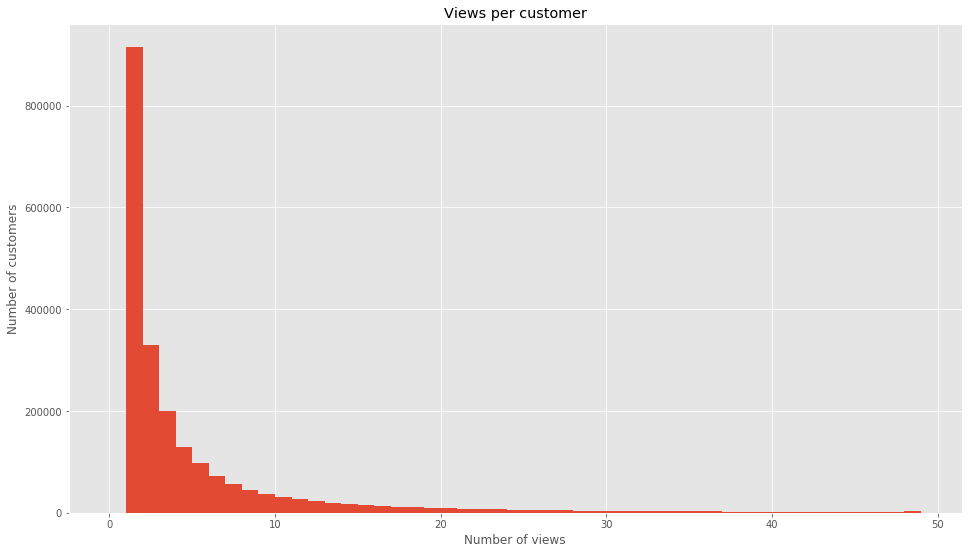

In [12]:
pyplot.figure()
pyplot.title('Views per customer')
pyplot.xlabel('Number of views')
pyplot.ylabel('Number of customers')
events.customer_id.value_counts().hist(bins=range(50))
pyplot.show()

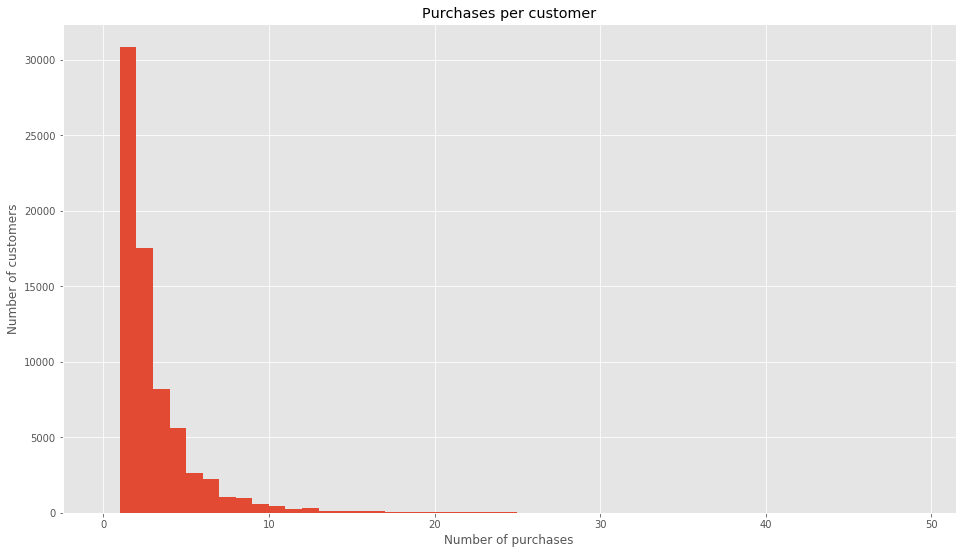

In [13]:
pyplot.figure()
pyplot.title('Purchases per customer')
pyplot.xlabel('Number of purchases')
pyplot.ylabel('Number of customers')
purchases.customer_id.value_counts().hist(bins=range(50))
pyplot.show()

## Timestamp

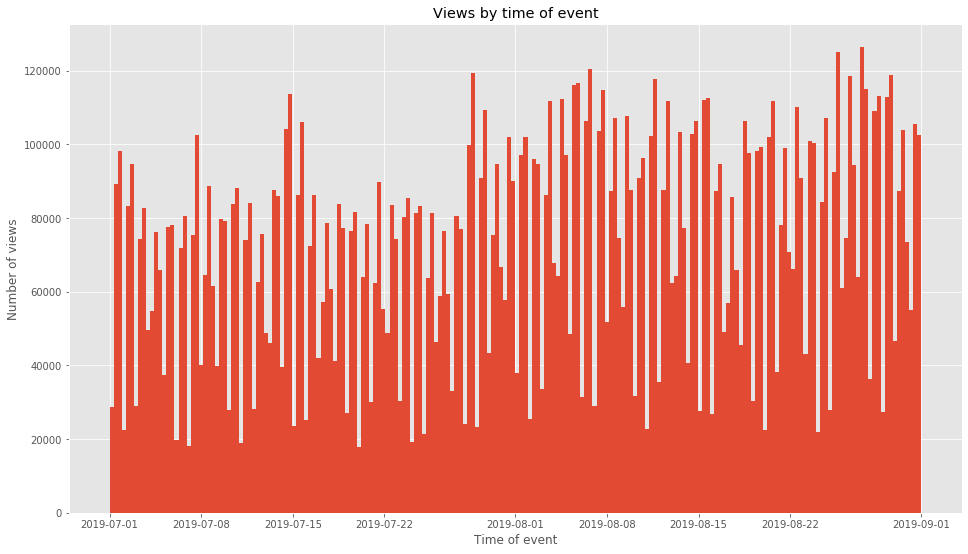

In [14]:
pandas.plotting.register_matplotlib_converters()

pyplot.figure()
pyplot.title('Views by time of event')
pyplot.xlabel('Time of event')
pyplot.ylabel('Number of views')
events.timestamp.hist(bins=200)
pyplot.show()

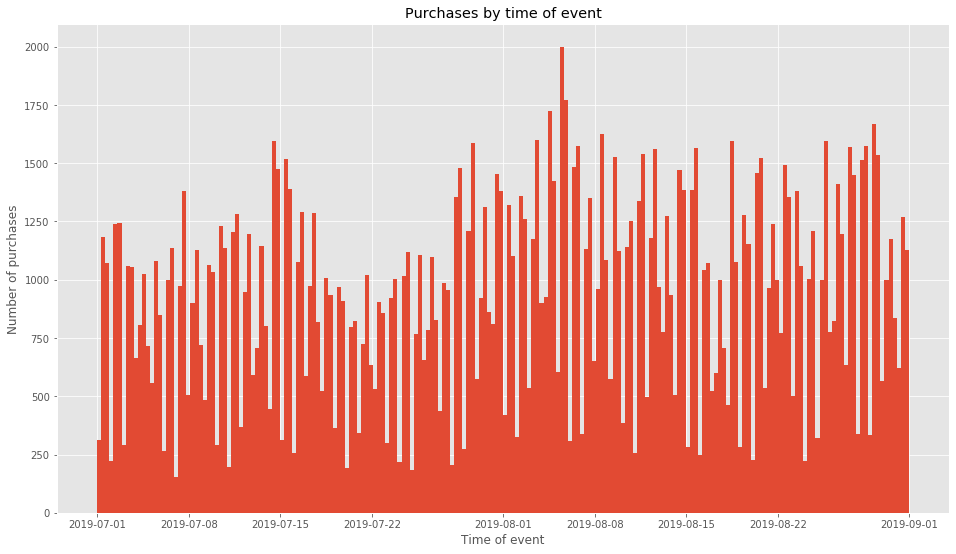

In [15]:
pyplot.figure()
pyplot.title('Purchases by time of event')
pyplot.xlabel('Time of event')
pyplot.ylabel('Number of purchases')
purchases.timestamp.hist(bins=200)
pyplot.show()

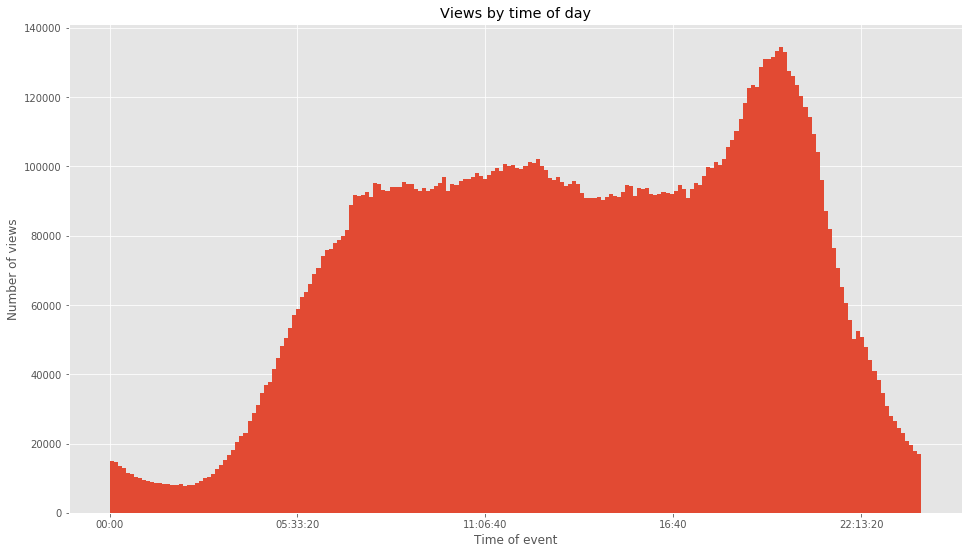

In [16]:
pyplot.figure()
pyplot.title('Views by time of day')
pyplot.xlabel('Time of event')
pyplot.ylabel('Number of views')
events.timestamp.dt.time.hist(bins=200)
pyplot.show()

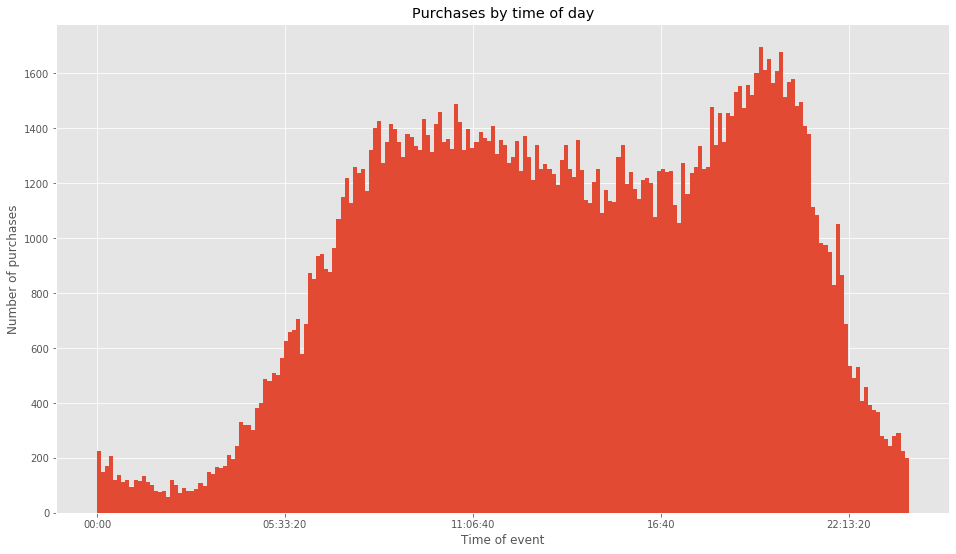

In [17]:
pyplot.figure()
pyplot.title('Purchases by time of day')
pyplot.xlabel('Time of event')
pyplot.ylabel('Number of purchases')
purchases.timestamp.dt.time.hist(bins=200)
pyplot.show()

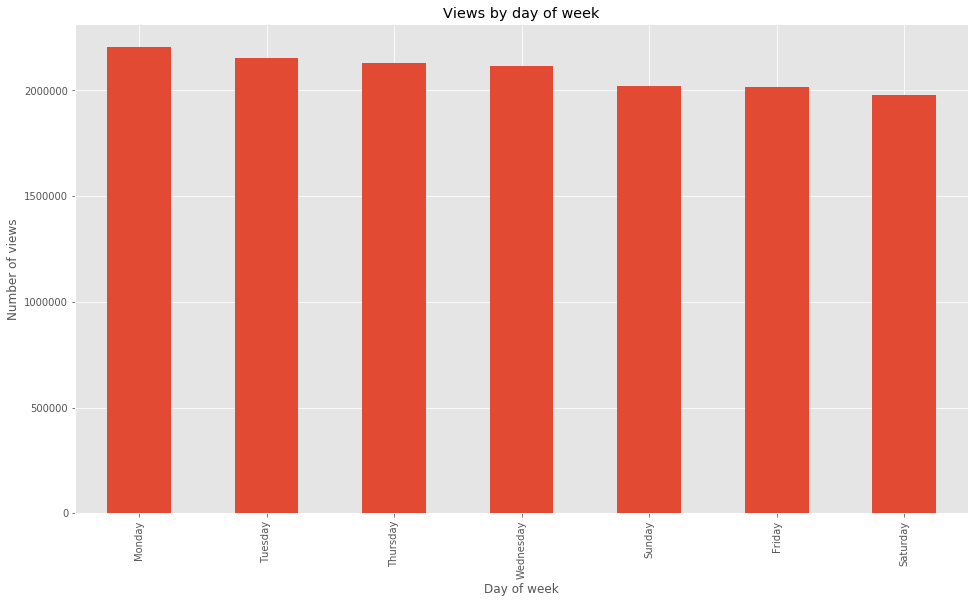

In [18]:
pyplot.figure()
pyplot.title('Views by day of week')
pyplot.xlabel('Day of week')
pyplot.ylabel('Number of views')
events.timestamp.dt.day_name().value_counts().plot.bar(align='center')
pyplot.show()

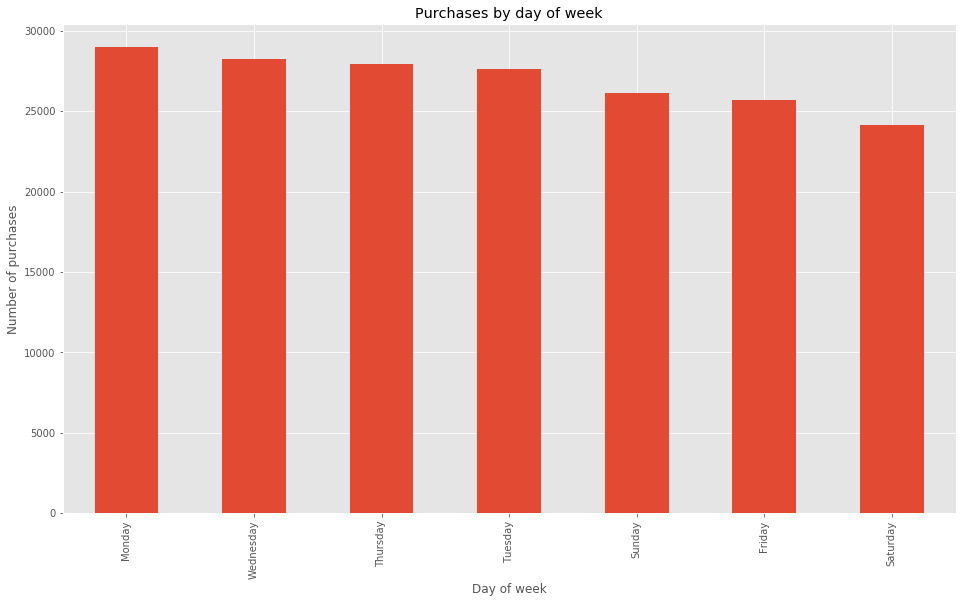

In [19]:
pyplot.figure()
pyplot.title('Purchases by day of week')
pyplot.xlabel('Day of week')
pyplot.ylabel('Number of purchases')
purchases.timestamp.dt.day_name().value_counts().plot.bar(align='center')
pyplot.show()

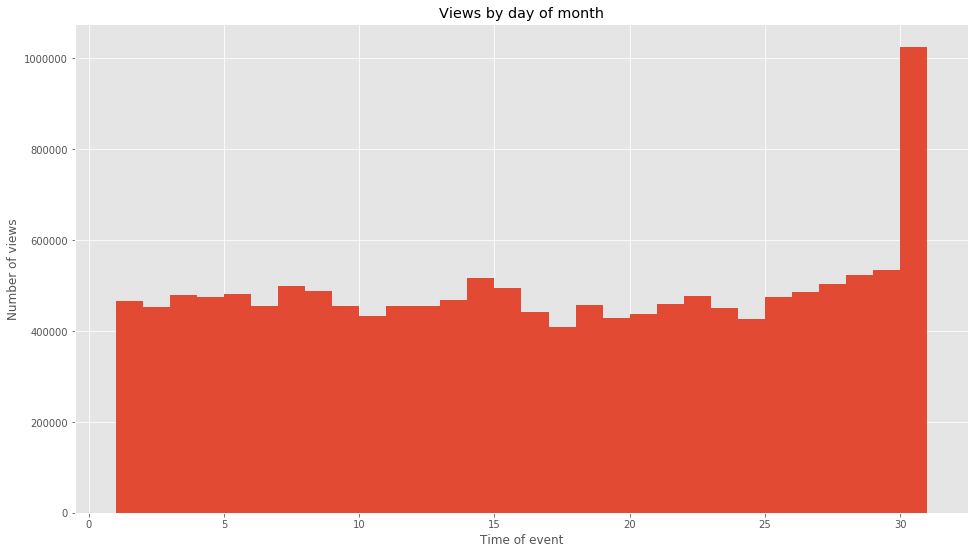

In [20]:
pyplot.figure()
pyplot.title('Views by day of month')
pyplot.xlabel('Time of event')
pyplot.ylabel('Number of views')
events.timestamp.dt.day.hist(bins=range(1, 32))
pyplot.show()

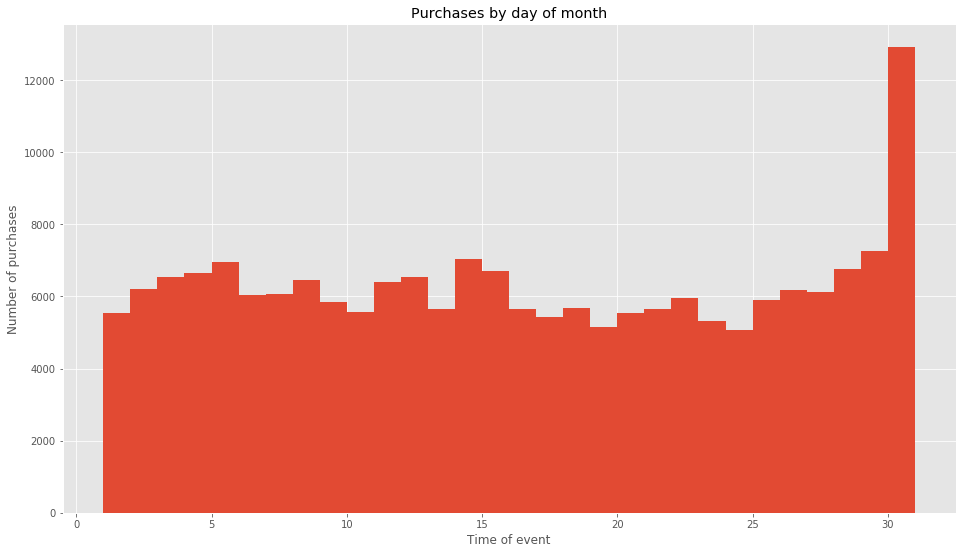

In [21]:
pyplot.figure()
pyplot.title('Purchases by day of month')
pyplot.xlabel('Time of event')
pyplot.ylabel('Number of purchases')
purchases.timestamp.dt.day.hist(bins=range(1, 32))
pyplot.show()

## Product ID

In [22]:
events.product_id.describe()

count                                 14614385
unique                                  123724
top       31ae211d-57a9-4bfa-b95f-40776af03c3f
freq                                     51428
Name: product_id, dtype: object

In [23]:
purchases.product_id.describe()

count                                   188712
unique                                   33613
top       de1b9182-defe-4c9f-8111-18fb8f1fa6c5
freq                                      1433
Name: product_id, dtype: object

In [24]:
events.product_id.value_counts().describe()

count    123724.000000
mean        118.120858
std         651.319651
min           1.000000
25%           4.000000
50%          17.000000
75%          67.000000
max       51428.000000
Name: product_id, dtype: float64

In [25]:
purchases.product_id.value_counts().describe()

count    33613.000000
mean         5.614256
std         26.825424
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1433.000000
Name: product_id, dtype: float64

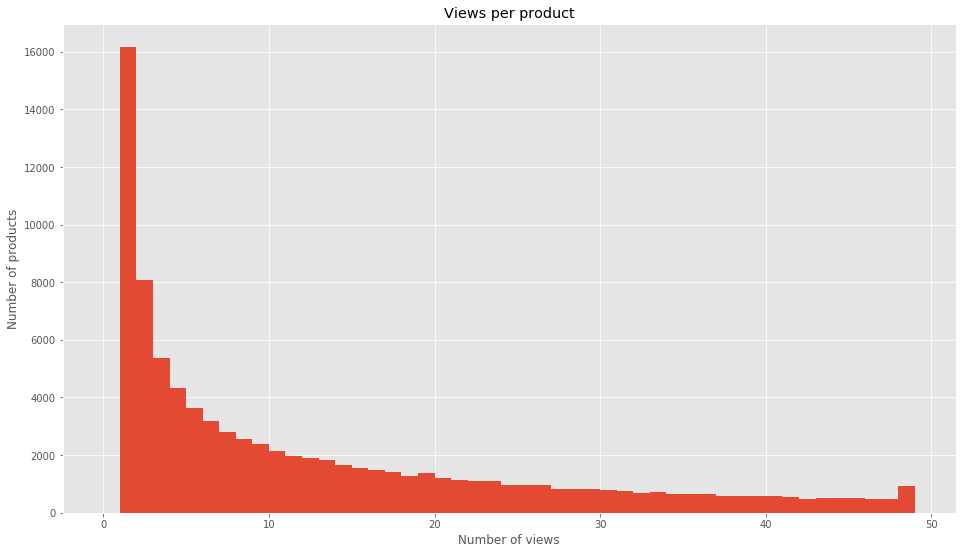

In [26]:
pyplot.figure()
pyplot.title('Views per product')
pyplot.xlabel('Number of views')
pyplot.ylabel('Number of products')
events.product_id.value_counts().hist(bins=range(50))
pyplot.show()

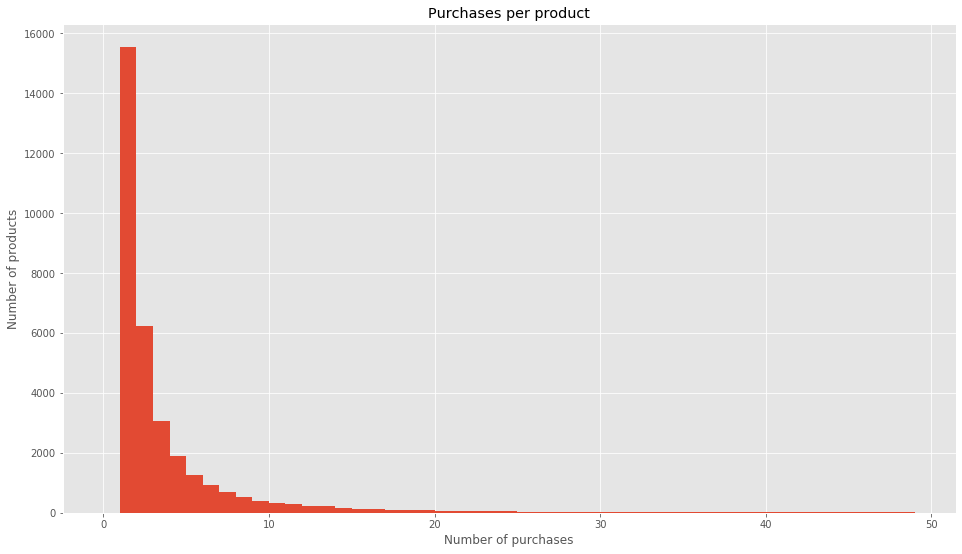

In [27]:
pyplot.figure()
pyplot.title('Purchases per product')
pyplot.xlabel('Number of purchases')
pyplot.ylabel('Number of products')
purchases.product_id.value_counts().hist(bins=range(50))
pyplot.show()

## Title

In [28]:
events.title.describe()

count                     14614385
unique                       71438
top       Lee Cooper Marl Backpack
freq                        163967
Name: title, dtype: object

In [29]:
purchases.title.describe()

count                       188712
unique                       19289
top       Lee Cooper Marl Backpack
freq                          4799
Name: title, dtype: object

In [30]:
events.title.str.len().describe()

count    1.461438e+07
mean     3.341714e+01
std      8.630339e+00
min      0.000000e+00
25%      2.700000e+01
50%      3.200000e+01
75%      3.800000e+01
max      1.970000e+02
Name: title, dtype: float64

In [31]:
purchases.title.str.len().describe()

count    188712.000000
mean         32.715885
std           8.535345
min           0.000000
25%          27.000000
50%          31.000000
75%          37.000000
max         109.000000
Name: title, dtype: float64

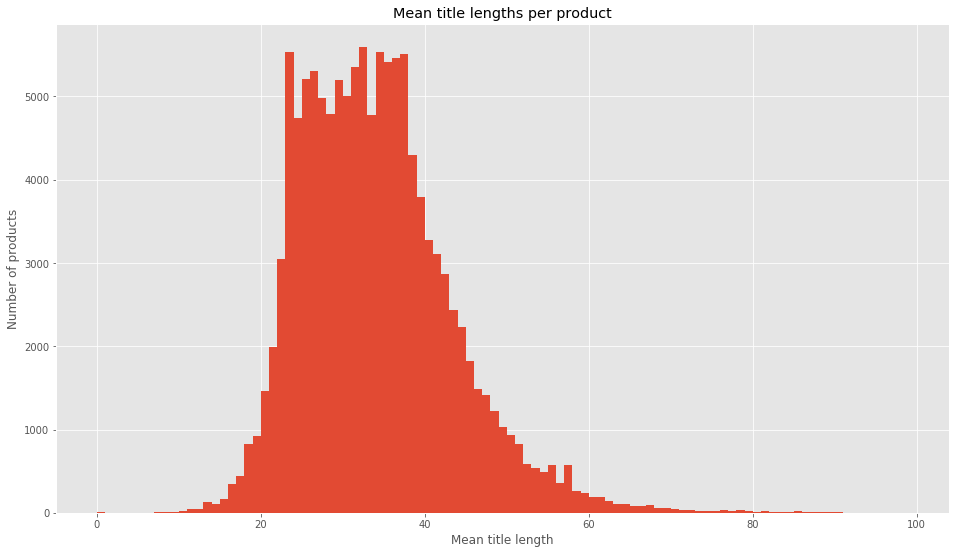

In [32]:
pyplot.figure()
pyplot.title('Mean title lengths per product')
pyplot.xlabel('Mean title length')
pyplot.ylabel('Number of products')
titles = pandas.concat([events, purchases]).groupby('product_id').title
titles.apply(lambda column: column.str.len().mean()).hist(bins=range(100))
pyplot.show()

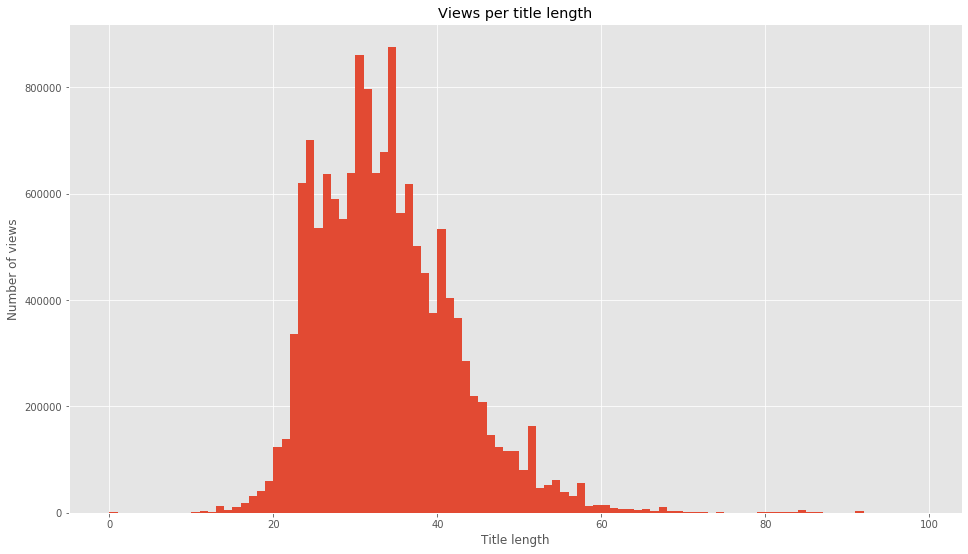

In [33]:
pyplot.figure()
pyplot.title('Views per title length')
pyplot.xlabel('Title length')
pyplot.ylabel('Number of views')
events.title.str.len().hist(bins=range(100))
pyplot.show()

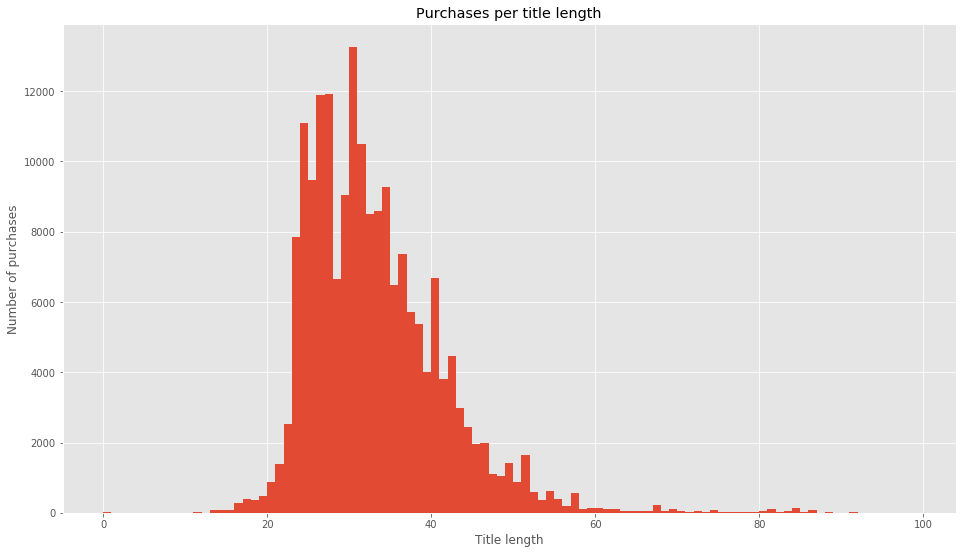

In [34]:
pyplot.figure()
pyplot.title('Purchases per title length')
pyplot.xlabel('Title length')
pyplot.ylabel('Number of purchases')
purchases.title.str.len().hist(bins=range(100))
pyplot.show()

## Category name

In [35]:
events.category_name.describe()

count     14614385
unique         714
top               
freq       3390834
Name: category_name, dtype: object

In [36]:
purchases.category_name.describe()

count     188712
unique       629
top             
freq       44898
Name: category_name, dtype: object

In [37]:
events.category_name.str.len().describe()

count    1.461438e+07
mean     3.355017e+01
std      2.086378e+01
min      0.000000e+00
25%      2.300000e+01
50%      4.000000e+01
75%      4.800000e+01
max      1.100000e+02
Name: category_name, dtype: float64

In [38]:
purchases.category_name.str.len().describe()

count    188712.000000
mean         32.464385
std          20.809606
min           0.000000
25%           6.000000
50%          39.000000
75%          48.000000
max         110.000000
Name: category_name, dtype: float64

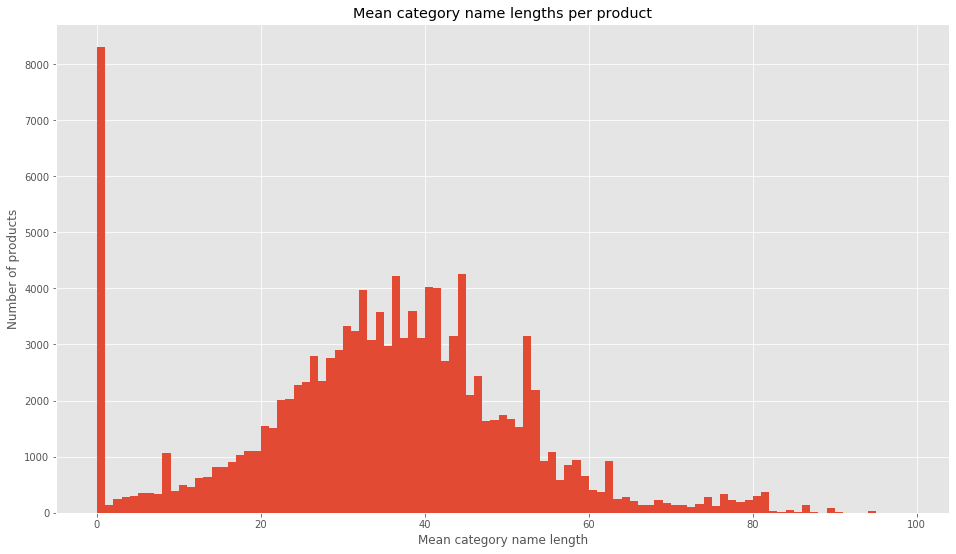

In [39]:
pyplot.figure()
pyplot.title('Mean category name lengths per product')
pyplot.xlabel('Mean category name length')
pyplot.ylabel('Number of products')
category_names = pandas.concat([events, purchases]).groupby('product_id').category_name
category_names.apply(lambda column: column.str.len().mean()).hist(bins=range(100))
pyplot.show()

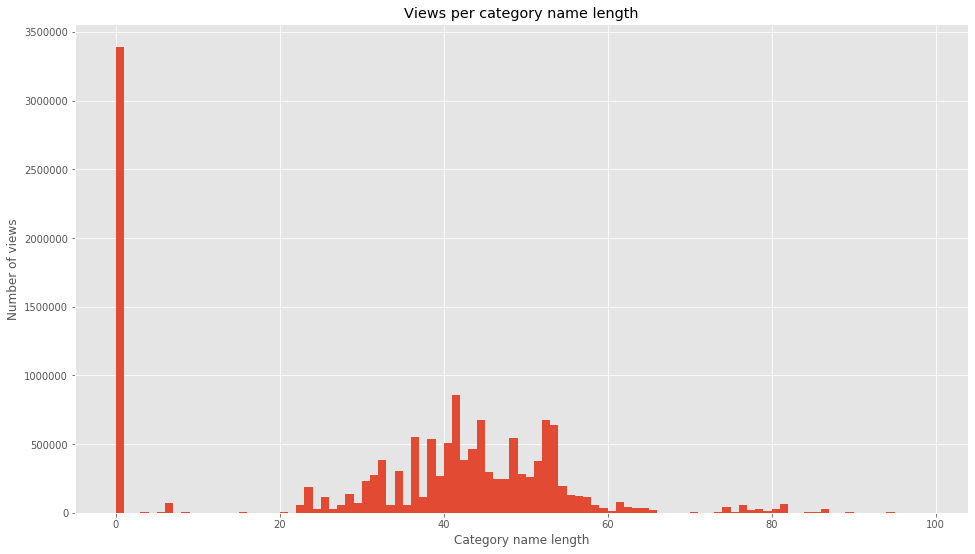

In [40]:
pyplot.figure()
pyplot.title('Views per category name length')
pyplot.xlabel('Category name length')
pyplot.ylabel('Number of views')
events.category_name.str.len().hist(bins=range(100))
pyplot.show()

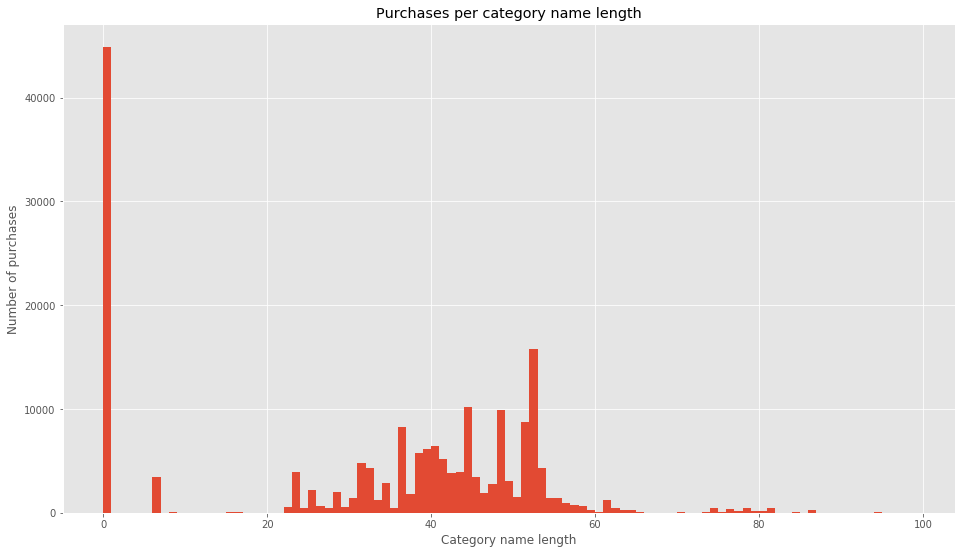

In [41]:
pyplot.figure()
pyplot.title('Purchases per category name length')
pyplot.xlabel('Category name length')
pyplot.ylabel('Number of purchases')
purchases.category_name.str.len().hist(bins=range(100))
pyplot.show()

In [42]:
purchases.category_name.str.count('>').describe()

count    188712.000000
mean          2.010868
std           1.277349
min           0.000000
25%           0.000000
50%           3.000000
75%           3.000000
max           6.000000
Name: category_name, dtype: float64

In [43]:
purchases.category_name.str.count('>').value_counts()

3    92728
0    48538
2    40142
4     4561
1     2739
6        4
Name: category_name, dtype: int64

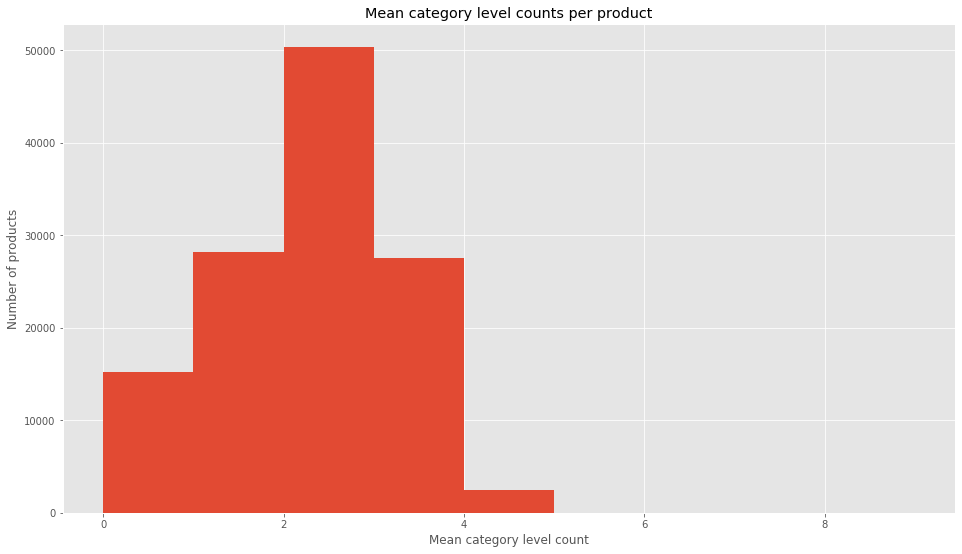

In [44]:
pyplot.figure()
pyplot.title('Mean category level counts per product')
pyplot.xlabel('Mean category level count')
pyplot.ylabel('Number of products')
category_names = pandas.concat([events, purchases]).groupby('product_id').category_name
category_names.apply(lambda column: column.str.count('>').mean()).hist(bins=range(10))
pyplot.show()

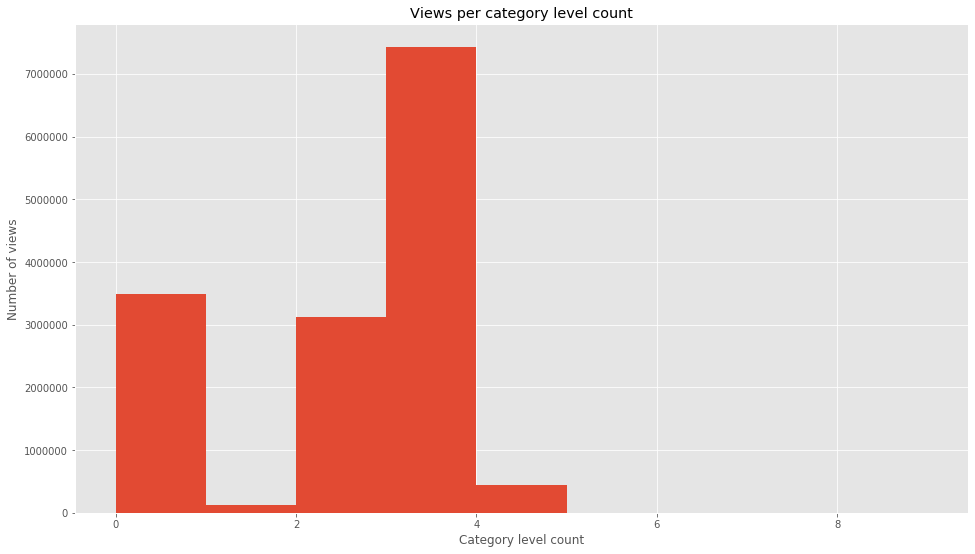

In [45]:
pyplot.figure()
pyplot.title('Views per category level count')
pyplot.xlabel('Category level count')
pyplot.ylabel('Number of views')
events.category_name.str.count('>').hist(bins=range(10))
pyplot.show()

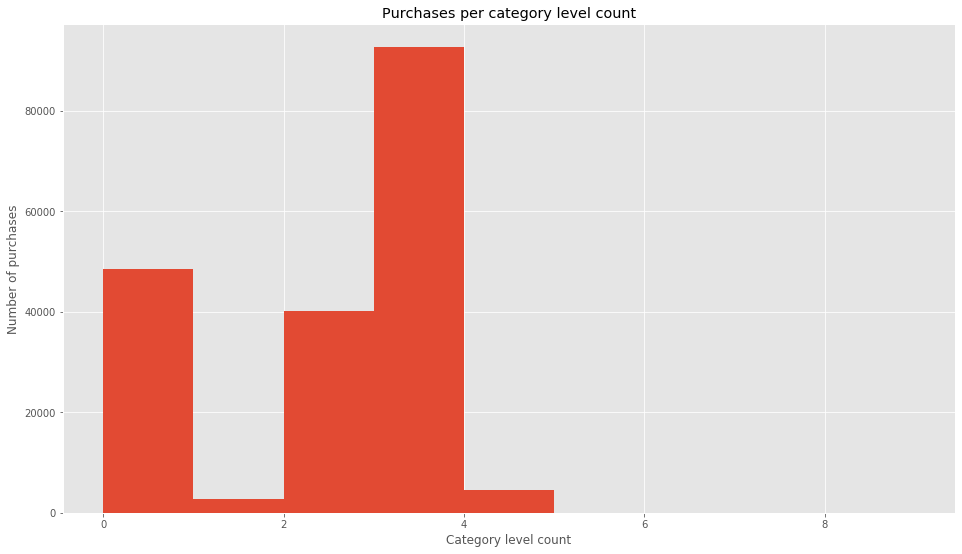

In [46]:
pyplot.figure()
pyplot.title('Purchases per category level count')
pyplot.xlabel('Category level count')
pyplot.ylabel('Number of purchases')
purchases.category_name.str.count('>').hist(bins=range(10))
pyplot.show()

## Price

In [47]:
events.price.describe()

count    1.461438e+07
mean     3.326869e+01
std      1.221099e+02
min      6.000000e-02
25%      1.273000e+01
50%      2.205000e+01
75%      3.975000e+01
max      3.263646e+04
Name: price, dtype: float64

In [48]:
purchases.price.describe()

count    143826.000000
mean         18.223261
std          16.149584
min           0.190000
25%           9.140000
50%          13.020000
75%          20.930000
max         312.830000
Name: price, dtype: float64

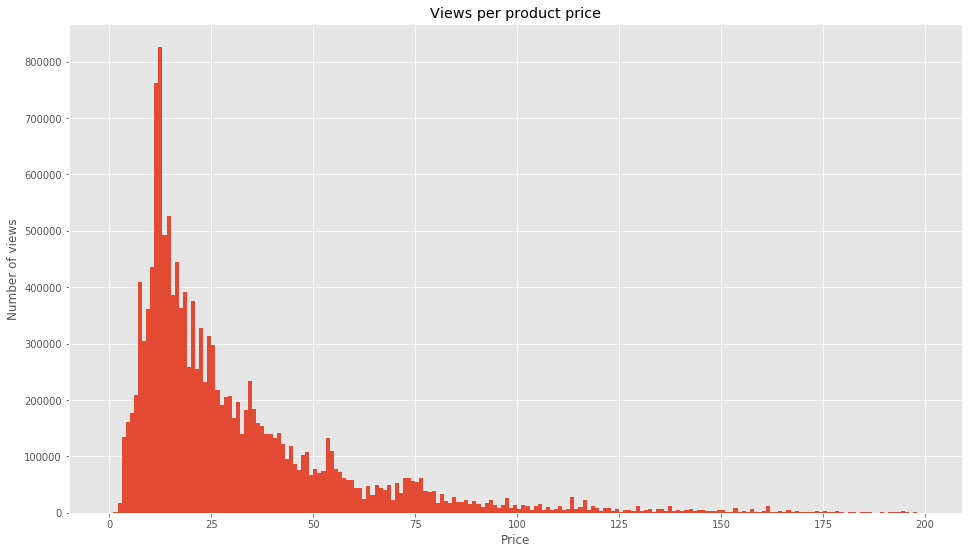

In [49]:
pyplot.figure()
pyplot.title('Views per product price')
pyplot.xlabel('Price')
pyplot.ylabel('Number of views')
events.price.hist(bins=range(200))
pyplot.show()

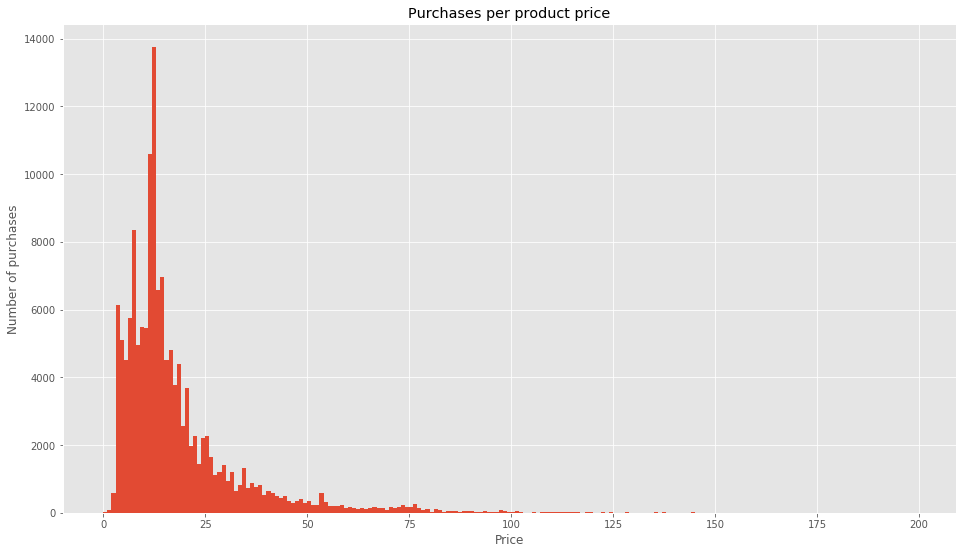

In [50]:
pyplot.figure()
pyplot.title('Purchases per product price')
pyplot.xlabel('Price')
pyplot.ylabel('Number of purchases')
purchases.price.hist(bins=range(200))
pyplot.show()

In [51]:
pandas.concat([events, purchases]).groupby('product_id').price.mean().describe()

count    123727.000000
mean         37.674428
std         187.346639
min           0.120000
25%          13.178457
50%          23.219600
75%          42.400972
max       32636.460000
Name: price, dtype: float64

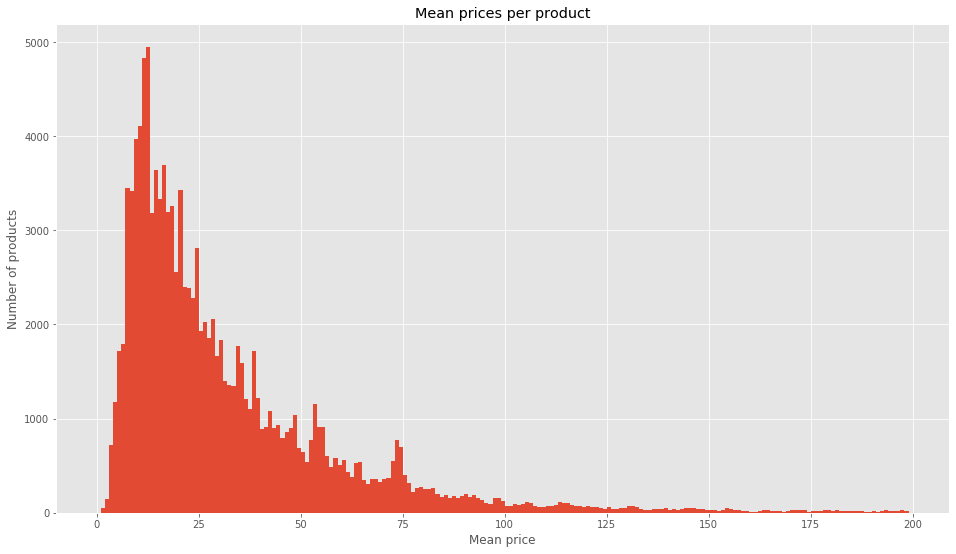

In [52]:
pyplot.figure()
pyplot.title('Mean prices per product')
pyplot.xlabel('Mean price')
pyplot.ylabel('Number of products')
pandas.concat([events, purchases]).groupby('product_id').price.mean().hist(bins=range(200))
pyplot.show()

In [53]:
events.groupby('customer_id').price.mean().describe()

count    2.210171e+06
mean     3.949652e+01
std      2.211189e+02
min      7.400000e-01
25%      1.520000e+01
50%      2.564000e+01
75%      4.418000e+01
max      3.263646e+04
Name: price, dtype: float64

In [54]:
purchases.groupby('customer_id').price.mean().describe()

count    54922.000000
mean        21.939009
std         17.931151
min          0.313333
25%         11.550000
50%         15.693929
75%         25.660000
max        244.870000
Name: price, dtype: float64

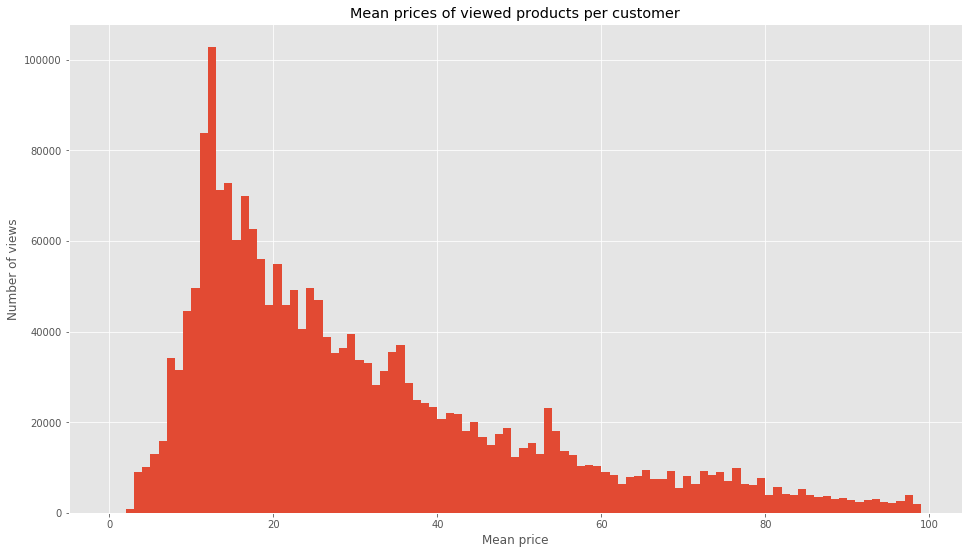

In [55]:
pyplot.figure()
pyplot.title('Mean prices of viewed products per customer')
pyplot.xlabel('Mean price')
pyplot.ylabel('Number of views')
events.groupby('customer_id').price.mean().hist(bins=range(100))
pyplot.show()

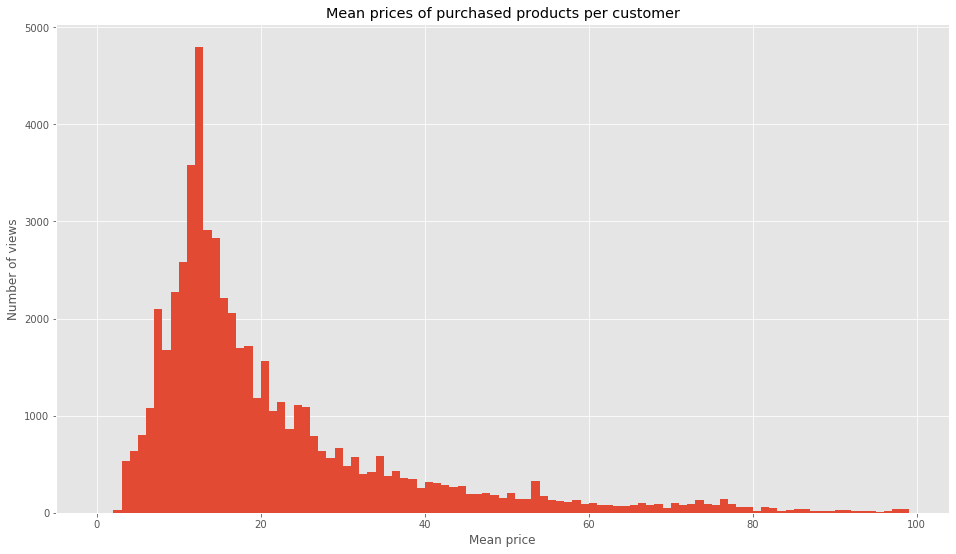

In [56]:
pyplot.figure()
pyplot.title('Mean prices of purchased products per customer')
pyplot.xlabel('Mean price')
pyplot.ylabel('Number of views')
purchases.groupby('customer_id').price.mean().hist(bins=range(100))
pyplot.show()